## ALGORITMO DE CLASIFICACION

# APLICACION DE MODELO RANDOM FOREST 

In [ ]:
#obtenicon de librerias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings("ignore")

import ipywidgets as widgets #librearia para interaccion del usuario con los graficos
import missingno as msno

from scipy.stats import norm
from scipy import stats

from statsmodels.graphics.gofplots import qqplot

from prettytable import PrettyTable

from statistics import median
 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import make_column_selector



In [ ]:
#Función para pasar a minúsculas los string de una lista o array
def to_lowercase(arr):
 new_arr = []
 for x in list(range(0,len(arr))):
   new = arr[x].lower()
   new_arr.append(new)
 return new_arr

In [ ]:
#Funcion para extraer el primer digito de una lista o array

def getFirstDigit(num):
    while num >= 10:
        num = int(num/10)
    return num


In [ ]:
#Determinar cuántas columnas y rows queremos que nos muestre por defecto
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

In [ ]:
#Obtencion de los datos:
data=pd.read_csv("https://raw.githubusercontent.com/johanjohnson/DataCleaning---ChurnDataSet/main/churn_raw_data.csv")
df=pd.DataFrame(data)
df.head(2)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4


In [ ]:
#creo un df 'original' para volver e casos necesarios
original= df
df = original.copy(deep=True)

## Manipulacion de datos de todo el dataset





In [ ]:
# Crear una variable booleana de churn con 0 y 1 

df['Churn_bool']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Churn_bool']

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Churn_bool, Length: 10000, dtype: int64

###*Creacion de nuevas variables*

In [ ]:
#Borramos la primer columna porque son índices
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,Churn_bool
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4,0
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,1
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3,0


In [ ]:
#pasamos a minuscula la primera letra del encabezado
col_names = to_lowercase(df.columns.values)

df.set_axis(col_names,axis='columns',inplace=True)

df.columns.values

array(['caseorder', 'customer_id', 'interaction', 'city', 'state',
       'county', 'zip', 'lat', 'lng', 'population', 'area', 'timezone',
       'job', 'children', 'age', 'education', 'employment', 'income',
       'marital', 'gender', 'churn', 'outage_sec_perweek', 'email',
       'contacts', 'yearly_equip_failure', 'techie', 'contract',
       'port_modem', 'tablet', 'internetservice', 'phone', 'multiple',
       'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies',
       'paperlessbilling', 'paymentmethod', 'tenure', 'monthlycharge',
       'bandwidth_gb_year', 'item1', 'item2', 'item3', 'item4', 'item5',
       'item6', 'item7', 'item8', 'churn_bool'], dtype=object)

In [ ]:
#Variable que unifique los valores obtenidos en la encuesta

df['total_encuesta']=df.item1.values+df.item2.values+df.item3.values+df.item4.values+df.item5.values+df.item6.values+df.item7.values+df.item8.values
df['total_encuesta']

0       33
1       28
2       27
3       29
4       32
        ..
9995    23
9996    34
9997    33
9998    33
9999    21
Name: total_encuesta, Length: 10000, dtype: int64

In [ ]:
#Cambiar los nombres de las últimas columnas reemplazar itemx por el nombre del item:

factores_items = {'item1': 'timely_response', 
                  'item2': 'timely_fixes', 
                  'item3': 'timely_replacements', 
                  'item4': 'reliability', 
                  'item5': 'options',
                  'item6': 'respectful_response',
                  'item7': 'courteous_exchange',
                  'item8': 'active_listening'}

df.rename(columns=factores_items, inplace=True)

df.head(2)

,caseorder,customer_id,interaction,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening,churn_bool,total_encuesta
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4,0,33
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,1,28


In [ ]:
#Nuevas variables que cuentan la cantidad de cada tipo de servicios y el total de servicios que los clientes contratan

df['q_online_serv'] = df.internetservice.apply(lambda x: 1 if x in ['Fiber Optic', 'DSL'] else 0).values +df.onlinesecurity.apply(lambda x: 1 if x == 'Yes' else 0).values + df.onlinebackup.apply(lambda x: 1 if x == 'Yes' else 0).values+df.techsupport.apply(lambda x: 1 if x== 'Yes' else 0).values
df['q_phone_serv']=df.phone.apply(lambda x: 1 if x == 'Yes' else 0).values+df.deviceprotection.apply(lambda x: 1 if x == 'Yes' else 0).values
df['q_streaming'] = df.streamingtv.apply(lambda x:1 if x=='Yes' else 0).values + df.streamingmovies.apply(lambda x:1 if x=='Yes'else 0).values

df['q_total_serv']=df['q_online_serv'].values+df['q_phone_serv'].values+df['q_streaming'].values

In [ ]:
#Creacion de variable zip_zone agrupando los zip teniendo en cuenta su primer digito quen indica una de las 9 zonas generales de EEUU

df['zip_zone'] = df.zip.apply(lambda x: getFirstDigit(x))
df.groupby('zip_zone').count()

,caseorder,customer_id,interaction,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening,churn_bool,total_encuesta,q_online_serv,q_phone_serv,q_streaming,q_total_serv
zip_zone,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,908,916,1216,1216,911,1216,1216,1216,1216,1216,1216,1216,922,1216,1216,1216,1216,1067,1216,1216,1216,1216,1108,1216,1216,1216,1216,1082,1216,1100,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216
2,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,903,897,1177,1177,903,1177,1177,1177,1177,1177,1177,1177,901,1177,1177,1177,1177,1057,1177,1177,1177,1177,1054,1177,1177,1177,1177,1081,1177,1064,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177
3,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,868,878,1140,1140,853,1140,1140,1140,1140,1140,1140,1140,852,1140,1140,1140,1140,1016,1140,1140,1140,1140,1043,1140,1140,1140,1140,1039,1140,1023,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140
4,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,926,925,1228,1228,899,1228,1228,1228,1228,1228,1228,1228,941,1228,1228,1228,1228,1117,1228,1228,1228,1228,1112,1228,1228,1228,1228,1102,1228,1101,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228
5,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,877,885,1170,1170,875,1170,1170,1170,1170,1170,1170,1170,867,1170,1170,1170,1170,1046,1170,1170,1170,1170,1058,1170,1170,1170,1170,1061,1170,1058,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170
6,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,849,862,1183,1183,904,1183,1183,1183,1183,1183,1183,1183,872,1183,1183,1183,1183,1066,1183,1183,1183,1183,1059,1183,1183,1183,1183,1099,1183,1064,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183
7,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,948,898,1236,1236,933,1236,1236,1236,1236,1236,1236,1236,934,1236,1236,1236,1236,1104,1236,1236,1236,1236,1097,1236,1236,1236,1236,1116,1236,1109,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236
8,710,710,710,710,710,710,710,710,710,710,710,710,710,537,528,710,710,521,710,710,710,710,710,710,710,523,710,710,710,710,645,710,710,710,710,627,710,710,710,710,637,710,629,710,710,710,710,710,710,710,710,710,710,710,710,710,710
9,940,940,940,940,940,940,940,940,940,940,940,940,940,689,736,940,940,711,940,940,940,940,940,940,940,711,940,940,940,940,856,940,940,940,940,851,940,940,940,940,852,940,831,940,940,940,940,940,940,940,940,940,940,940,940,940,940


In [ ]:
#contactos vs tenure

df['contacts_by_month'] = df['contacts']/df['tenure']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   caseorder             10000 non-null  int64  
 1   customer_id           10000 non-null  object 
 2   interaction           10000 non-null  object 
 3   city                  10000 non-null  object 
 4   state                 10000 non-null  object 
 5   county                10000 non-null  object 
 6   zip                   10000 non-null  int64  
 7   lat                   10000 non-null  float64
 8   lng                   10000 non-null  float64
 9   population            10000 non-null  int64  
 10  area                  10000 non-null  object 
 11  timezone              10000 non-null  object 
 12  job                   10000 non-null  object 
 13  children              7505 non-null   float64
 14  age                   7525 non-null   float64
 15  education           

In [ ]:
df.head(1)

,caseorder,customer_id,interaction,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening,churn_bool,total_encuesta,q_online_serv,q_phone_serv,q_streaming,q_total_serv,zip_zone,contacts_by_month
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.53611,5,5,5,3,4,4,3,4,0,33,3,1,1,5,9,0.0


###*Eliminado de varibales que no son significativas para el modelo*

In [ ]:
#las dejo comentadas porque vamos a aplicar PCA

#Eliminamos las variables que no necesitamos vamos a utilizar:

df.drop([ 'caseorder', 'customer_id', 'interaction', 'city',
       'state', 'county', 'zip', 'timezone', 'job', 'education'],axis=1,inplace=True)

df.drop('churn', axis=1, inplace=True)

##Spliteo

In [ ]:
# split input y target

X = df.drop('churn_bool', axis=1)
y = df['churn_bool']

#split de modelo
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=10, stratify=y)


print(X_train.shape, y_train.shape)

(8000, 47) (8000,)


In [ ]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count    8000.000000
mean        0.265000
std         0.441361
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn_bool, dtype: float64


In [ ]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count    2000.000000
mean        0.265000
std         0.441444
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn_bool, dtype: float64


###*Rellenado de valores nulos*

In [ ]:
X_train.isnull().sum()[X_train.isnull().sum()>0]

children             1984
age                  1986
income               1996
techie               1970
phone                 805
techsupport           801
tenure                736
bandwidth_gb_year     803
contacts_by_month     736
dtype: int64

In [ ]:
#Rellenado de variable children con la mediana de la agrupacion

#creo datarrame de referencia

children_ref_null = X_train.groupby(['gender','marital','employment']).median()['children'].reset_index()
children_ref_null

,gender,marital,employment,children
0,Female,Divorced,Full Time,2.0
1,Female,Divorced,Part Time,2.0
2,Female,Divorced,Retired,2.0
3,Female,Divorced,Student,1.0
4,Female,Divorced,Unemployed,1.0
5,Female,Married,Full Time,1.0
6,Female,Married,Part Time,2.0
7,Female,Married,Retired,1.0
8,Female,Married,Student,1.5
9,Female,Married,Unemployed,1.0


In [ ]:
#funcion de replace en base a dataframe agrupado
def fill_na_children_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['children']):
    return df_grouped[(df_grouped['gender'] == row_replace['gender'])&(df_grouped['marital'] == row_replace['marital'])&(df_grouped['employment'] == row_replace['employment'])]['children'].values[0]
  else:
    return row_replace['children']


#transformacion de train
X_train['children'] = X_train.apply(lambda row: fill_na_children_grouped(children_ref_null, row), axis=1)

X_train.isnull().sum()

lat                        0
lng                        0
population                 0
area                       0
children                   2
age                     1986
employment                 0
income                  1996
marital                    0
gender                     0
outage_sec_perweek         0
email                      0
contacts                   0
yearly_equip_failure       0
techie                  1970
contract                   0
port_modem                 0
tablet                     0
internetservice            0
phone                    805
multiple                   0
onlinesecurity             0
onlinebackup               0
deviceprotection           0
techsupport              801
streamingtv                0
streamingmovies            0
paperlessbilling           0
paymentmethod              0
tenure                   736
monthlycharge              0
bandwidth_gb_year        803
timely_response            0
timely_fixes               0
timely_replace

In [ ]:
#obtencion de la moda de la variable children para rellenar los 2 nulos restantes.
train_children_mode = X_train['children'].mode()[0]
X_train.children = X_train.children.fillna(train_children_mode)
train_children_mode 
X_train.isnull().sum()

lat                        0
lng                        0
population                 0
area                       0
children                   0
age                     1986
employment                 0
income                  1996
marital                    0
gender                     0
outage_sec_perweek         0
email                      0
contacts                   0
yearly_equip_failure       0
techie                  1970
contract                   0
port_modem                 0
tablet                     0
internetservice            0
phone                    805
multiple                   0
onlinesecurity             0
onlinebackup               0
deviceprotection           0
techsupport              801
streamingtv                0
streamingmovies            0
paperlessbilling           0
paymentmethod              0
tenure                   736
monthlycharge              0
bandwidth_gb_year        803
timely_response            0
timely_fixes               0
timely_replace

In [ ]:
#Rellenado de variable age con la mediana de la agrupacion

#creo datarrame de referencia

age_ref_null = X_train.groupby(['gender','marital','employment']).median()['age'].reset_index()
age_ref_null

#funcion de replace en base a dataframe agrupado
def fill_na_age_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['age']):
    return df_grouped[(df_grouped['gender'] == row_replace['gender'])&(df_grouped['marital'] == row_replace['marital'])&(df_grouped['employment'] == row_replace['employment'])]['age'].values[0]
  else:
    return row_replace['age']


#transformacion de train
X_train['age'] = X_train.apply(lambda row: fill_na_age_grouped(age_ref_null, row), axis=1)

X_train.isnull().sum()

lat                        0
lng                        0
population                 0
area                       0
children                   0
age                        2
employment                 0
income                  1996
marital                    0
gender                     0
outage_sec_perweek         0
email                      0
contacts                   0
yearly_equip_failure       0
techie                  1970
contract                   0
port_modem                 0
tablet                     0
internetservice            0
phone                    805
multiple                   0
onlinesecurity             0
onlinebackup               0
deviceprotection           0
techsupport              801
streamingtv                0
streamingmovies            0
paperlessbilling           0
paymentmethod              0
tenure                   736
monthlycharge              0
bandwidth_gb_year        803
timely_response            0
timely_fixes               0
timely_replace

In [ ]:
#obtencion de la moda de la variable age para rellenar los 2 nulos restantes.
train_age_mode = X_train['age'].mode()[0]
X_train.age = X_train.age.fillna(train_age_mode)
train_age_mode 
#X_train.isnull().sum()

53.0

In [ ]:
#Rellenado de variable income con la media de la agrupacion

#creo dataframe de referencia

income_ref_null = X_train.groupby(['gender','marital','employment']).mean()['income'].reset_index()
income_ref_null

#funcion de replace en base a dataframe agrupado
def fill_na_income_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['income']):
    return df_grouped[(df_grouped['gender'] == row_replace['gender'])&(df_grouped['marital'] == row_replace['marital'])&(df_grouped['employment'] == row_replace['employment'])]['income'].values[0]
  else:
    return row_replace['income']


#transformacion de train
X_train['income'] = X_train.apply(lambda row: fill_na_income_grouped(income_ref_null, row), axis=1)

X_train.isnull().sum()

lat                        0
lng                        0
population                 0
area                       0
children                   0
age                        0
employment                 0
income                     0
marital                    0
gender                     0
outage_sec_perweek         0
email                      0
contacts                   0
yearly_equip_failure       0
techie                  1970
contract                   0
port_modem                 0
tablet                     0
internetservice            0
phone                    805
multiple                   0
onlinesecurity             0
onlinebackup               0
deviceprotection           0
techsupport              801
streamingtv                0
streamingmovies            0
paperlessbilling           0
paymentmethod              0
tenure                   736
monthlycharge              0
bandwidth_gb_year        803
timely_response            0
timely_fixes               0
timely_replace

In [ ]:
#Rellenado de variable techie con NS/NC
X_train['techie'].fillna('NS/NC', inplace=True)
#Rellenado de variable phone con NS/NC
X_train['phone'].fillna('NS/NC', inplace=True)
#Rellenado de variable techsupport con NS/NC
X_train['techsupport'].fillna('NS/NC', inplace=True)
#Rellenado de variable tenure con 0 haciendo referencia a 0 meses transcurridos desde la firma de contrato
X_train['tenure'].fillna(0, inplace=True)


In [ ]:
#Rellenado de variable bandwidth_gb_year con la mediana de la agrupacion

#creo datarrame de referencia

band_ref_null = X_train.groupby(['contract','q_streaming']).median()['bandwidth_gb_year'].reset_index()
band_ref_null

#funcion de replace en base a dataframe agrupado
def fill_na_band_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['bandwidth_gb_year']):
    return df_grouped[(df_grouped['contract'] == row_replace['contract'])&(df_grouped['q_streaming'] == row_replace['q_streaming'])]['bandwidth_gb_year'].values[0]
  else:
    return row_replace['bandwidth_gb_year']


#transformacion de train
X_train['bandwidth_gb_year'] = X_train.apply(lambda row: fill_na_band_grouped(band_ref_null, row), axis=1)

X_train.isnull().sum()


lat                       0
lng                       0
population                0
area                      0
children                  0
age                       0
employment                0
income                    0
marital                   0
gender                    0
outage_sec_perweek        0
email                     0
contacts                  0
yearly_equip_failure      0
techie                    0
contract                  0
port_modem                0
tablet                    0
internetservice           0
phone                     0
multiple                  0
onlinesecurity            0
onlinebackup              0
deviceprotection          0
techsupport               0
streamingtv               0
streamingmovies           0
paperlessbilling          0
paymentmethod             0
tenure                    0
monthlycharge             0
bandwidth_gb_year         0
timely_response           0
timely_fixes              0
timely_replacements       0
reliability         

In [ ]:
X_train['contacts_by_month'].fillna(X_train['contacts'],inplace=True)

###*Agrupado de valores en variables categoricas*


In [ ]:
#No lo considero necesario en esta primer prueba del moedelo ya que 
#la categoria con mayor cantidad de valores es employment que tiene 5. Aceptable para one hot encoding

In [ ]:
X_train.employment.value_counts()

Full Time     4796
Part Time      819
Retired        809
Unemployed     799
Student        777
Name: employment, dtype: int64

###*Transformacion de variables cuantitativas*

In [ ]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int'])
numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 117 to 7678
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lat                   8000 non-null   float64
 1   lng                   8000 non-null   float64
 2   population            8000 non-null   int64  
 3   children              8000 non-null   float64
 4   age                   8000 non-null   float64
 5   income                8000 non-null   float64
 6   outage_sec_perweek    8000 non-null   float64
 7   email                 8000 non-null   int64  
 8   contacts              8000 non-null   int64  
 9   yearly_equip_failure  8000 non-null   int64  
 10  tenure                8000 non-null   float64
 11  monthlycharge         8000 non-null   float64
 12  bandwidth_gb_year     8000 non-null   float64
 13  timely_response       8000 non-null   int64  
 14  timely_fixes          8000 non-null   int64  
 15  timely_replacements

In [ ]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns#.to_list()
cat_cols

Index(['area', 'employment', 'marital', 'gender', 'techie', 'contract',
       'port_modem', 'tablet', 'internetservice', 'phone', 'multiple',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [ ]:
#seleccion de columnas normalizadas
normal_cols = []

#loop en todas las columnas del x_train
for col in numeric_cols.columns:

  #calculo de D'Agostino's K-squared test
  k2, p_value = stats.normaltest(numeric_cols[col])
  #chequeo de si p-value es mayor a 0.05
  if p_value > 0.05:
    normal_cols.append(col)
  
  #print de todas las variables con su valor
  print(f"columna {col} -----Estadístico = {k2}, p-value = {p_value}")

#seleccion de las variables que no estan en normal,  nos daran el resto de columnas no seleccionadas
not_stander = list(set(numeric_cols.columns) - set(normal_cols))


columna lat -----Estadístico = 598.9648717769833, p-value = 8.638347420348221e-131
columna lng -----Estadístico = 1944.9342021055136, p-value = 0.0
columna population -----Estadístico = 3642.4907579125947, p-value = 0.0
columna children -----Estadístico = 2813.0022002800924, p-value = 0.0
columna age -----Estadístico = 328.1089906539104, p-value = 5.649863404187498e-72
columna income -----Estadístico = 2829.16315249172, p-value = 0.0
columna outage_sec_perweek -----Estadístico = 4954.294254782738, p-value = 0.0
columna email -----Estadístico = 0.06573239470491196, p-value = 0.9676680274712856
columna contacts -----Estadístico = 1042.8042507791943, p-value = 3.6135501857577665e-227
columna yearly_equip_failure -----Estadístico = 2484.1481262706293, p-value = 0.0
columna tenure -----Estadístico = 34439.38532146221, p-value = 0.0
columna monthlycharge -----Estadístico = 281.38396166393716, p-value = 7.911322281899981e-62
columna bandwidth_gb_year -----Estadístico = 41786.649220303996, p-v

In [ ]:
normal_cols

['email',
 'timely_fixes',
 'reliability',
 'courteous_exchange',
 'active_listening',
 'total_encuesta']

In [ ]:
not_stander

['lat',
 'population',
 'contacts_by_month',
 'respectful_response',
 'lng',
 'q_online_serv',
 'timely_replacements',
 'tenure',
 'q_total_serv',
 'children',
 'yearly_equip_failure',
 'age',
 'q_phone_serv',
 'zip_zone',
 'outage_sec_perweek',
 'monthlycharge',
 'timely_response',
 'contacts',
 'options',
 'bandwidth_gb_year',
 'income',
 'q_streaming']

In [ ]:
#proceso de transformacion en X_train

#standarizacion es el z-score utilizado para variables ya con distribucion normal
sc = StandardScaler()
X_train[normal_cols] = sc.fit_transform(X_train[normal_cols])

#utilizacion para cambiar el valor con una distribucion mas desconocida
rs = RobustScaler()
X_train[not_stander] = rs.fit_transform(X_train[not_stander])


X_train

,lat,lng,population,area,children,age,employment,income,marital,gender,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening,total_encuesta,q_online_serv,q_phone_serv,q_streaming,q_total_serv,zip_zone,contacts_by_month
117,0.196199,-0.531688,-0.146230,Urban,0.5,1.062500,Part Time,0.541610,Divorced,Female,0.293001,-0.005632,1.0,0.0,NS/NC,Two Year,No,Yes,Fiber Optic,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Electronic Check,-0.086711,1.696821,-0.342360,1.0,1.441404,1.0,0.491062,-2.0,1.0,0.467559,0.487782,0.460913,0.0,1.0,1.0,1.0,0.25,1.716407
1133,-0.203567,-1.028791,0.089329,Suburban,-0.5,-1.395833,Student,-1.217060,Divorced,Female,-0.284959,-0.668199,-0.5,0.0,No,Month-to-month,No,Yes,None,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Electronic Check,-0.290487,0.830044,-0.552458,0.0,-1.456861,-1.0,-2.429029,1.0,-1.0,0.467559,-0.489982,-1.615791,-1.0,1.0,1.0,0.0,0.75,-0.150382
9860,0.153765,-0.594810,-0.165252,Rural,3.5,-0.979167,Full Time,-1.126608,Married,Male,6.711489,-0.999483,-0.5,0.0,No,Month-to-month,No,No,Fiber Optic,No,No,No,No,Yes,No,No,Yes,No,Credit Card (automatic),-0.317895,0.290333,0.621508,1.0,0.475316,1.0,0.491062,-2.0,1.0,2.413696,0.487782,0.691658,-0.5,0.0,0.0,-0.5,0.25,-0.150382
8531,-0.592631,-0.649899,0.600541,Urban,0.0,-0.270833,Full Time,-0.501662,Married,Female,-0.050139,-0.336915,0.0,1.0,No,Month-to-month,No,Yes,Fiber Optic,NS/NC,No,No,Yes,No,Yes,No,No,No,Credit Card (automatic),0.944347,-0.370278,0.645062,-1.0,-1.456861,-2.0,2.437789,0.0,2.0,-1.478578,0.487782,-0.692811,0.5,-1.0,-1.0,-0.5,0.50,-0.036412
8917,-0.512668,-0.042412,-0.124585,Suburban,-0.5,-0.645833,Full Time,-1.110740,Married,Male,-0.604125,-0.005632,-0.5,1.0,NS/NC,Two Year,No,No,Fiber Optic,Yes,No,No,No,Yes,No,No,No,No,Electronic Check,0.455183,-0.760554,0.127728,1.0,1.441404,3.0,1.464425,-1.0,1.0,0.467559,1.465547,1.614637,-0.5,1.0,-1.0,-0.5,-0.50,-0.150382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8429,-0.155296,0.529973,0.024802,Rural,1.5,0.229167,Full Time,0.007454,Separated,Female,-0.383251,1.650787,0.0,0.0,Yes,Month-to-month,Yes,Yes,DSL,Yes,No,No,No,No,NS/NC,Yes,No,No,Credit Card (automatic),-0.317895,-0.896066,0.760540,1.0,-0.490773,1.0,-0.482302,2.0,0.0,-0.505509,-0.489982,-0.000577,-0.5,0.0,0.0,-0.5,-0.75,7.679541
2738,-1.785348,0.323905,0.407617,Suburban,0.0,0.000000,Full Time,-0.650334,Separated,Female,-0.813467,0.325652,-0.5,0.0,NS/NC,One year,No,No,Fiber Optic,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Electronic Check,-0.198250,1.019250,-0.485588,2.0,-0.490773,2.0,-1.455665,1.0,0.0,-0.505509,-1.467747,-0.231322,0.5,0.0,1.0,1.0,-0.50,-0.150382
834,-0.054807,0.485890,-0.161399,Rural,0.0,-0.062500,Full Time,0.281816,Separated,Male,1.104406,-0.336915,-0.5,0.0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,No,No,No,No,Yes,No,No,Electronic Check,-0.202360,0.014393,-0.521691,1.0,-1.456861,1.0,0.491062,0.0,0.0,1.440628,1.465547,0.460913,-0.5,0.0,0.0,-0.5,-0.75,-0.150382
5632,0.203393,0.378490,0.736400,Suburban,0.0,-0.229167,Part Time,0.043767,Separated,Female,-0.720046,-0.668199,0.0,0.0,No,Month-to-month,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,No,No,No,Bank Transfer(automatic),0.729310,-0.505033,0.537567,1.0,1.441404,1.0,-0.482302,1.0,0.0,0.467559,-0.489982,0.460913,0.0,1.0,-1.0,0.0,-0.25,-0.013009


###Transformacion de categoricas en variables dummy con One Hot Encoder

In [ ]:
cat_cols

Index(['area', 'employment', 'marital', 'gender', 'techie', 'contract',
       'port_modem', 'tablet', 'internetservice', 'phone', 'multiple',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [ ]:
#generate one hot encoder class
encoder = OneHotEncoder(handle_unknown='ignore', #ponemos ignore para poder ommitir cuando puede pasar que no exista los mismos valores.LE DAMOS FLEXIBILIDAD AL MODELO0 
                        sparse=False,drop='if_binary') # generarlo como. matrix para poder generar las columnas adecuadas

#entrenamiento para genera el preprocesamiento one hot encoding para las variables indicadas
encoder.fit(X_train[cat_cols])

#extraigo los nombres de las columnas para usar de diccionario
encoder_cols=encoder.get_feature_names_out(cat_cols)

#transformo en train datasets en base a la clase generada
cat_encoding = pd.DataFrame(encoder.transform(X_train[cat_cols]), columns=encoder_cols)
cat_encoding.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   area_Rural                              8000 non-null   float64
 1   area_Suburban                           8000 non-null   float64
 2   area_Urban                              8000 non-null   float64
 3   employment_Full Time                    8000 non-null   float64
 4   employment_Part Time                    8000 non-null   float64
 5   employment_Retired                      8000 non-null   float64
 6   employment_Student                      8000 non-null   float64
 7   employment_Unemployed                   8000 non-null   float64
 8   marital_Divorced                        8000 non-null   float64
 9   marital_Married                         8000 non-null   float64
 10  marital_Never Married                   8000 non-null   floa

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 117 to 7678
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lat                   8000 non-null   float64
 1   lng                   8000 non-null   float64
 2   population            8000 non-null   float64
 3   area                  8000 non-null   object 
 4   children              8000 non-null   float64
 5   age                   8000 non-null   float64
 6   employment            8000 non-null   object 
 7   income                8000 non-null   float64
 8   marital               8000 non-null   object 
 9   gender                8000 non-null   object 
 10  outage_sec_perweek    8000 non-null   float64
 11  email                 8000 non-null   float64
 12  contacts              8000 non-null   float64
 13  yearly_equip_failure  8000 non-null   float64
 14  techie                8000 non-null   object 
 15  contract           

In [ ]:
# Reseteamos el index para poder concatenarlo con el df de los cat_encoding:(si no hago esto,se alarga el dataset)

X_train.reset_index(inplace = True, drop=True)
y_train.reset_index(inplace = True, drop=True)

In [ ]:
#joineo de las variables que deseo con categoricas encoding CON EL DF. AGREGO COLUMNAS AL DF
X_all_train = pd.concat([X_train, cat_encoding], axis=1)


#Borrado de columnas no necesarias
X_all_train.drop(['area', 'employment', 'marital', 'gender', 'techie', 'contract',
       'port_modem', 'tablet', 'internetservice', 'phone', 'multiple',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod'],axis=1, inplace=True)

#train datasets final
X_all_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 72 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lat                                     8000 non-null   float64
 1   lng                                     8000 non-null   float64
 2   population                              8000 non-null   float64
 3   children                                8000 non-null   float64
 4   age                                     8000 non-null   float64
 5   income                                  8000 non-null   float64
 6   outage_sec_perweek                      8000 non-null   float64
 7   email                                   8000 non-null   float64
 8   contacts                                8000 non-null   float64
 9   yearly_equip_failure                    8000 non-null   float64
 10  tenure                                  8000 non-null   floa

In [ ]:
X_all_train.isnull().sum()[X_all_train.isnull().sum()>0]

Series([], dtype: int64)

##*Entrenamiento con Train*

In [ ]:
# crear el clasificador
classifier = RandomForestClassifier(n_estimators=500, random_state=42) 

# Entrenar el modelo usando el conjunto de entranamiento
classifier.fit(X_all_train, y_train) 

RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
#print(classification_report(y_train , classifier.predict(X_all_train)))
#No entiendo poruqe Damian toma metricas en este punto del entrenamiento

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5880
           1       1.00      1.00      1.00      2120

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



##*Transformacion del Test con lo entrenado*

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 2585 to 8967
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lat                   2000 non-null   float64
 1   lng                   2000 non-null   float64
 2   population            2000 non-null   int64  
 3   area                  2000 non-null   object 
 4   children              1489 non-null   float64
 5   age                   1511 non-null   float64
 6   employment            2000 non-null   object 
 7   income                1506 non-null   float64
 8   marital               2000 non-null   object 
 9   gender                2000 non-null   object 
 10  outage_sec_perweek    2000 non-null   float64
 11  email                 2000 non-null   int64  
 12  contacts              2000 non-null   int64  
 13  yearly_equip_failure  2000 non-null   int64  
 14  techie                1493 non-null   object 
 15  contract          

####Rellenado con lo entrenado

In [ ]:
X_test.isnull().sum()[X_test.isnull().sum()>0]

children             511
age                  489
income               494
techie               507
phone                221
techsupport          190
tenure               195
bandwidth_gb_year    218
contacts_by_month    195
dtype: int64

In [ ]:
#Rellenado de variable children
X_test['children'] = X_test.apply(lambda row: fill_na_children_grouped(children_ref_null, row), axis=1)


In [ ]:
#Rellenado de variable age
X_test['age'] = X_test.apply(lambda row: fill_na_age_grouped(age_ref_null, row), axis=1)


In [ ]:
#Rellenado de variable income
X_test['income'] = X_test.apply(lambda row: fill_na_income_grouped(income_ref_null, row), axis=1)


In [ ]:
#Rellenado de variable techie con NS/NC
X_test['techie'].fillna('NS/NC', inplace=True)


In [ ]:
#Rellenado de variable phone con NS/NC
X_test['phone'].fillna('NS/NC', inplace=True)

In [ ]:
#Rellenado de variable techsupport con NS/NC
X_test['techsupport'].fillna('NS/NC', inplace=True)

In [ ]:
#Rellenado de variable tenure con 0 haciendo referencia a 0 meses transcurridos desde la firma de contrato
X_test['tenure'].fillna(0, inplace=True)

X_test.isnull().sum()

lat                       0
lng                       0
population                0
area                      0
children                  0
age                       0
employment                0
income                    0
marital                   0
gender                    0
outage_sec_perweek        0
email                     0
contacts                  0
yearly_equip_failure      0
techie                    0
contract                  0
port_modem                0
tablet                    0
internetservice           0
phone                     0
multiple                  0
onlinesecurity            0
onlinebackup              0
deviceprotection          0
techsupport               0
streamingtv               0
streamingmovies           0
paperlessbilling          0
paymentmethod             0
tenure                    0
monthlycharge             0
bandwidth_gb_year       218
timely_response           0
timely_fixes              0
timely_replacements       0
reliability         

In [ ]:
#Rellenado de variable bandwidth_gb_year 
X_test['bandwidth_gb_year'] = X_test.apply(lambda row: fill_na_band_grouped(band_ref_null, row),axis=1)

In [ ]:
#Rellenado de variable contacts_by_month 
#X_test['contacts_by_month'] = X_test.apply(lambda row: fill_na_contact_grouped(contact_ref_null, row), axis=1)
#X_train.isnull().sum()
X_test['contacts_by_month'].fillna(X_test['contacts'],inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 2585 to 8967
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lat                   2000 non-null   float64
 1   lng                   2000 non-null   float64
 2   population            2000 non-null   int64  
 3   area                  2000 non-null   object 
 4   children              2000 non-null   float64
 5   age                   2000 non-null   float64
 6   employment            2000 non-null   object 
 7   income                2000 non-null   float64
 8   marital               2000 non-null   object 
 9   gender                2000 non-null   object 
 10  outage_sec_perweek    2000 non-null   float64
 11  email                 2000 non-null   int64  
 12  contacts              2000 non-null   int64  
 13  yearly_equip_failure  2000 non-null   int64  
 14  techie                2000 non-null   object 
 15  contract          

###Transformacion de variables cuantitativas

In [ ]:
X_test[normal_cols] = sc.transform(X_test[normal_cols])
X_test[not_stander] = rs.transform(X_test[not_stander])
X_test.head()

,lat,lng,population,area,children,age,employment,income,marital,gender,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening,total_encuesta,q_online_serv,q_phone_serv,q_streaming,q_total_serv,zip_zone,contacts_by_month
2585,-0.296451,-1.923534,-0.167466,Suburban,1.5,1.187500,Full Time,-0.001185,Married,Male,-0.052302,-0.999483,0.5,0.0,No,One year,Yes,No,Fiber Optic,Yes,Yes,No,Yes,No,NS/NC,No,No,No,Bank Transfer(automatic),-0.038407,-0.083914,-0.388914,1.0,0.475316,1.0,-1.455665,1.0,1.0,0.467559,-0.489982,0.230168,0.0,0.0,-1.0,-0.5,1.00,0.879051
7801,-1.534669,0.314779,0.413602,Rural,1.0,1.312500,Full Time,0.007454,Separated,Female,-0.374255,-0.336915,-0.5,0.0,Yes,Two Year,Yes,No,None,Yes,Yes,No,No,No,No,Yes,Yes,No,Mailed Check,0.856985,0.619474,0.632397,0.0,-0.490773,2.0,-1.455665,1.0,1.0,0.467559,1.465547,0.460913,-1.0,0.0,1.0,-0.5,-0.50,-0.150382
2178,0.656004,-0.180530,-0.007666,Urban,0.0,0.437500,Full Time,0.363215,Separated,Male,0.859189,-0.336915,0.5,0.0,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,Yes,Yes,Yes,Credit Card (automatic),-0.255726,0.604300,-0.568980,-1.0,-0.490773,-1.0,-0.482302,2.0,-1.0,-2.451646,-0.489982,-1.615791,-0.5,0.0,1.0,0.0,0.00,4.477536
5,-1.025491,0.235082,1.212438,Urban,1.0,1.229167,Full Time,0.067526,Never Married,Female,-0.535185,0.988219,1.0,1.0,No,One year,Yes,No,None,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Electronic Check,-0.189268,0.226531,-0.502084,0.0,-0.490773,0.0,-1.455665,1.0,0.0,-0.505509,-0.489982,-0.923556,0.0,1.0,0.0,0.5,-0.50,3.204823
8478,0.245996,0.086979,-0.236502,Rural,0.0,0.312500,Full Time,-0.381237,Separated,Male,-0.195843,-1.993334,-0.5,0.0,No,Month-to-month,No,Yes,None,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Bank Transfer(automatic),0.792320,-0.112869,0.548622,-1.0,-1.456861,-1.0,0.491062,-2.0,0.0,-0.505509,-0.489982,-1.846536,0.0,0.0,0.0,0.0,-0.25,-0.150382


###Transformacion con One Hot Encoder

In [ ]:
#transformo el test en datasets en base a la clase generada en el entrenamiento
cat_encoding_test = pd.DataFrame(encoder.transform(X_test[cat_cols]), columns=encoder_cols)
cat_encoding_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   area_Rural                              2000 non-null   float64
 1   area_Suburban                           2000 non-null   float64
 2   area_Urban                              2000 non-null   float64
 3   employment_Full Time                    2000 non-null   float64
 4   employment_Part Time                    2000 non-null   float64
 5   employment_Retired                      2000 non-null   float64
 6   employment_Student                      2000 non-null   float64
 7   employment_Unemployed                   2000 non-null   float64
 8   marital_Divorced                        2000 non-null   float64
 9   marital_Married                         2000 non-null   float64
 10  marital_Never Married                   2000 non-null   floa

In [ ]:
# Reseteamos el index para poder concatenarlo con el df de los cat_encoding:(si no hago esto,se alarga el dataset)

X_test.reset_index(inplace = True, drop=True)
y_test.reset_index(inplace = True, drop=True)

In [ ]:
#joineo de las variables que deseo con categoricas encoding CON EL DF. AGREGO COLUMNAS AL DF
X_all_test = pd.concat([X_test, cat_encoding_test], axis=1)


#Borrado de columnas no necesarias
X_all_test.drop(['area', 'employment', 'marital', 'gender', 'techie', 'contract',
       'port_modem', 'tablet', 'internetservice', 'phone', 'multiple',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod'],axis=1, inplace=True)

#train datasets final
X_all_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 72 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lat                                     2000 non-null   float64
 1   lng                                     2000 non-null   float64
 2   population                              2000 non-null   float64
 3   children                                2000 non-null   float64
 4   age                                     2000 non-null   float64
 5   income                                  2000 non-null   float64
 6   outage_sec_perweek                      2000 non-null   float64
 7   email                                   2000 non-null   float64
 8   contacts                                2000 non-null   float64
 9   yearly_equip_failure                    2000 non-null   float64
 10  tenure                                  2000 non-null   floa

In [ ]:
X_all_test.isnull().sum()[X_all_test.isnull().sum()>0]

Series([], dtype: int64)

## Prediccion

In [ ]:
y_pred = classifier.predict(X_all_test)

##*Metricas*

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, auc, roc_auc_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

logreg_cm = confusion_matrix(y_test, y_pred)
tp, fp, fn, tn =  logreg_cm.ravel()
print(classification_report(y_test, y_pred))

pd.Series({'accuracy': acc,
              'f1_score' : f1,
              'auc': auc,
              'true positive': tp,
              'true negative': tn})

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1470
           1       0.84      0.74      0.79       530

    accuracy                           0.89      2000
   macro avg       0.88      0.84      0.86      2000
weighted avg       0.89      0.89      0.89      2000



accuracy            0.894500
f1_score            0.787940
auc                 0.844981
true positive    1397.000000
true negative     392.000000
dtype: float64

Precision: El 84% de las veces que dije que la persona iba a abandonar la compañia, la abandono. Tengo un 84% de probabilidades de acertarle a mi prediccion de churn.

Recall: De todas las personas que abandonan la compañia, puedo predecir el 74%. 

F1_score: Nos referimos a un caclulo matematico que esta relacionado a la precision y al recall. En este caso es del 78%

CALCULO DE AUC???

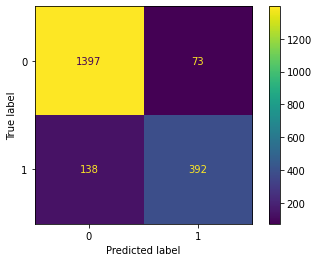

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_all_test, y_test)

Text(0, -0.3, 'Churn con RandomForestClassifier')

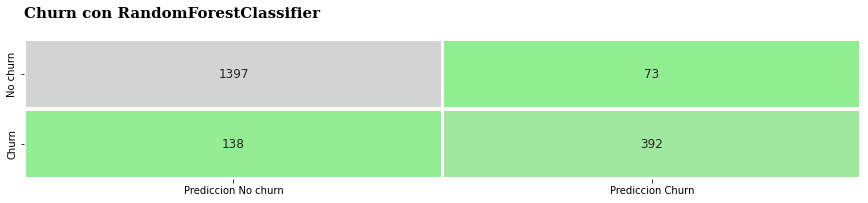

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


background_color = 'white' 
colormap = LinearSegmentedColormap.from_list("", ["lightgreen","lightgray"])


fig = plt.figure(figsize=(15,18)) 
fig.patch.set_facecolor(background_color) 
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

#grafico de la matriz de confusion 
sns.heatmap(logreg_cm, linewidths=2.5,yticklabels=['No churn','Churn'],
            xticklabels=['Prediccion No churn','Prediccion Churn'], 
            cmap=colormap, 
            cbar=None,
            annot=True,
            fmt='d',
            ax=ax0,
            annot_kws={"fontsize":12}
            )

ax0.text(0, -0.3, 'Churn con RandomForestClassifier',fontsize=15, fontweight='bold', fontfamily='serif')
    

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
#print(classification_report(y_test, y_pred))
#Esos recultados ya lo obtuvbimos arriba. Esta es otra opcion de codigo.

In [ ]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X_all_test.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
12,bandwidth_gb_year,0.129165
10,tenure,0.122492
11,monthlycharge,0.078844
24,q_streaming,0.062823
47,contract_Month-to-month,0.048270
27,contacts_by_month,0.043272
66,streamingmovies_Yes,0.029835
0,lat,0.022516
6,outage_sec_perweek,0.022488
5,income,0.022472
